In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
from sklearn.cross_validation import train_test_split

C:\Users\AliArmaghan\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
x_train, x_test, y_train, y_test = train_test_split(df, df['Outcome'], test_size=0.30)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knnmodel = KNeighborsClassifier(n_neighbors = 16)

In [47]:
knnmodel.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

In [48]:
pred = knnmodel.predict(x_test)

In [41]:

from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(confusion_matrix(y_test, pred))

[[139  11]
 [ 38  43]]


In [43]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.79      0.93      0.85       150
          1       0.80      0.53      0.64        81

avg / total       0.79      0.79      0.78       231



In [32]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
error_rate

[0.29870129870129869,
 0.2857142857142857,
 0.27705627705627706,
 0.25108225108225107,
 0.26839826839826841,
 0.23376623376623376,
 0.27272727272727271,
 0.23809523809523808,
 0.23809523809523808,
 0.21645021645021645,
 0.25541125541125542,
 0.22077922077922077,
 0.25974025974025972,
 0.22510822510822512,
 0.24675324675324675,
 0.21212121212121213,
 0.23376623376623376,
 0.21212121212121213,
 0.22510822510822512,
 0.25541125541125542,
 0.25541125541125542,
 0.2857142857142857,
 0.26839826839826841,
 0.27705627705627706,
 0.25541125541125542,
 0.26839826839826841,
 0.25974025974025972,
 0.25541125541125542,
 0.25974025974025972,
 0.25974025974025972,
 0.25108225108225107,
 0.26406926406926406,
 0.25974025974025972,
 0.25541125541125542,
 0.25541125541125542,
 0.24675324675324675,
 0.24242424242424243,
 0.25108225108225107,
 0.23809523809523808]

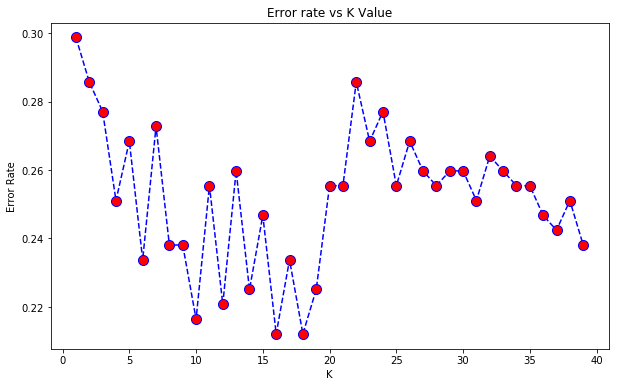

In [33]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error rate vs K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')